In [ ]:
# gym
!pip install "gym>=0.21.0"
!pip install tf-agents[reverb]

# reinforcement learning
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
#!pip install tf-agents[reverb] #already installed above
!pip install pyglet

In [1]:
# tensorflow
from tf_agents.policies import random_tf_policy

# standard python
import os
import time
import numpy as np
#import matplotlib.pyplot as plt

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/beerql

# ours
import tfdqn
tfdqn.validate_environment()

# uncomment below to test-run the environment
# tfdqn.test_run_environment()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/beerql


In [4]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"}
collect_steps_per_iteration =   1# @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"} 

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

In [5]:
env, train_py_env, eval_py_env, train_env, eval_env, agent = tfdqn.get_dqn_agent((100, 50), learning_rate)

In [6]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

In [7]:
# compute 5 episodes of random_policy for testing
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())
tfdqn.compute_avg_return(eval_env, random_policy, 5)

In [9]:
replay_buffer, rb_observer = tfdqn.get_replay_buffer(agent, replay_buffer_max_length)

In [10]:
returns = tfdqn.train(
  agent, env, train_py_env, train_env, eval_env, 
  replay_buffer, rb_observer, batch_size,
  num_iterations, initial_collect_steps, collect_steps_per_iteration, 
  log_interval, eval_interval, num_eval_episodes    
)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 200: loss = 9631.9794921875
step = 400: loss = 13081.8544921875
step = 600: loss = 5233.70703125
step = 800: loss = 10026.21484375
step = 1000: loss = 14747.814453125
step = 1000: Average Return = -6035.0
step = 1200: loss = 11312.962890625
step = 1400: loss = 5401.8828125
step = 1600: loss = 8846.1318359375
step = 1800: loss = 8285.794921875
step = 2000: loss = 8421.794921875
step = 2000: Average Return = -3258.0
step = 2200: loss = 4993.4814453125
step = 2400: loss = 6183.0517578125
step = 2600: loss = 9825.2060546875
step = 2800: loss = 8928.83203125
step = 3000: loss = 11589.779296875
step = 3000: Average Return = -4156.0
step = 3200: loss = 10164.5048828125
step = 3400: loss = 7618.3857421875
step = 3600: loss = 11954.9453125
step = 3800: loss = 8565.595703125
step = 4000: loss = 6541.7412109375
step = 4000: Average Return = -2941.0
step = 4200: loss = 12853.8994140625
step = 4400: loss = 8408.3916015625
step = 4600: loss = 11656.5888671875
step = 4800: loss = 12234.5390625

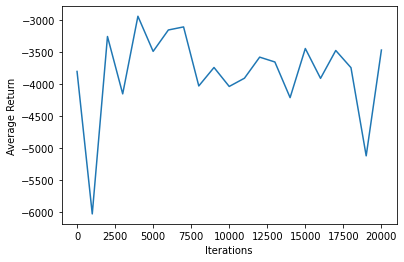

In [11]:
tfdqn.plot_returns(returns, num_iterations, eval_interval)